In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D


In [3]:
data = np.genfromtxt('Delivery.csv',delimiter = ',')
print(data)


[[100.    4.    9.3]
 [ 50.    3.    4.8]
 [100.    4.    8.9]
 [100.    2.    6.5]
 [ 50.    2.    4.2]
 [ 80.    2.    6.2]
 [ 75.    3.    7.4]
 [ 65.    4.    6. ]
 [ 90.    3.    7.6]
 [ 90.    2.    6.1]]


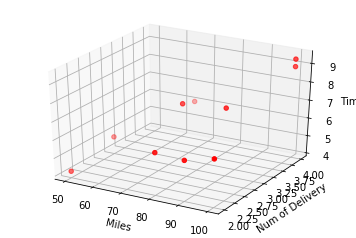

In [16]:
x_data = data[:,:-1]
y_data = data[:,-1]
ax = plt.figure().add_subplot(111, projection = '3d')
ax.scatter(x_data[:,0],x_data[:,1],y_data,c='r',marker = 'o')
ax.set_xlabel("Miles")
ax.set_ylabel("Num of Delivery")
ax.set_zlabel("Time")
plt.show()

In [17]:
lr = 0.0001
theta0 = 0
theta1 = 0
theta2 = 0
epochs = 1000

In [33]:
def computeError(x_data,y_data,theta0,theta1,theta2):
    totalError = 0
    for i in range(0,len(x_data)):
        totalError += (theta0*x_data[i,0] + theta1*x_data[i,1] + theta2 - y_data[i])**2
    return totalError / float(len(x_data))


def gradient_descent(x_data,y_data,theta0,theta1,theta2,lr,epochs):
    m = float(len(x_data))
    for i in range(epochs):
        grad_theta0 = 0
        grad_theta1 = 0
        grad_theta2 = 0
        for j in range(0,len(x_data)):
            grad_theta0 += (1/m)*(x_data[j,0])*(theta0*x_data[j,0] + theta1*x_data[j,1] + theta2 - y_data[j])
            grad_theta1 += (1/m)*(x_data[j,1])*(theta0*x_data[j,0] + theta1*x_data[j,1] + theta2 - y_data[j])
            grad_theta2 += (1/m)*(theta0*x_data[j,0] + theta1*x_data[j,1] + theta2 - y_data[j])
            
        theta0 = theta0 - (lr*grad_theta0)
        theta1 = theta1 - (lr*grad_theta1)
        theta2 = theta2 - (lr*grad_theta2)
        
#         print('epoch :',i)
#         print('theta0 : ',theta0)
#         print('theta1 : ',theta1)
#         print('theta2 : ',theta2)
        
    return theta0,theta1,theta2


    
    

In [34]:
error = computeError(x_data, y_data,theta0, theta1, theta2)
print("residual : ",error)
print("Starting theta0 = {0}, theta1 = {1}, theta2 = {2}, error = {3}".
      format(theta0, theta1, theta2, computeError( x_data, y_data,theta0, theta1, theta2)))

residual :  47.279999999999994
Starting theta0 = 0, theta1 = 0, theta2 = 0, error = 47.279999999999994


In [38]:
t0,t1,t2 = gradient_descent(x_data,y_data,theta0,theta1,theta2,lr,epochs)
print("After {4} iterations theta0 = {0}, theta1 = {1}, theta2 = {2}, error = {3}".
      format(t0, t1, t2, computeError( x_data, y_data,t0, t1, t2),epochs))

After 1000 loop theta0 = 0.08021042690771771, theta1 = 0.07611036240566814, theta2 = 0.006971416196678632, error = 0.7731271432218118


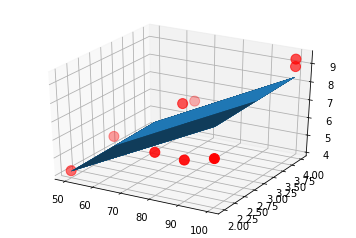

In [42]:

ax = plt.figure().add_subplot(111, projection = '3d') 
ax.scatter(x_data[:,0], x_data[:,1], y_data, c = 'r', marker = 'o', s = 100) #点为红色三角形  

x0,x1 = np.meshgrid(x_data[:,0],x_data[:,1])
z = t0*x0 + t1*x1 + t2
ax.plot_surface(x0,x1,z)
plt.show()




